# Importing of Necessary Modules

In [347]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [349]:
from ucimlrepo import fetch_ucirepo  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  

# Fetch Dataset

In [352]:
# Fetch dataset  
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)  

# Load data (as pandas DataFrames)  
X = breast_cancer_wisconsin_diagnostic.data.features  
y = breast_cancer_wisconsin_diagnostic.data.targets  

In [353]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [354]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [355]:
y.tail()

,Diagnosis
564,M
565,M
566,M
567,M
568,B


# Displaying Dataset Information

In [357]:
# Display metadata  
print(breast_cancer_wisconsin_diagnostic.metadata)  

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [358]:
# Display variable information  
print(breast_cancer_wisconsin_diagnostic.variables)  

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

In [359]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [360]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


# Label Encoding (Binary Encoding) of the Target Variable

In [362]:
# Convert y to a 1D pandas Series
y = y.squeeze()  

# Encode labels and keep as Series
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y), index=y.index)  


In [363]:
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [364]:
y.tail()

564    1
565    1
566    1
567    1
568    0
dtype: int64

# Exploratory Data Analysis

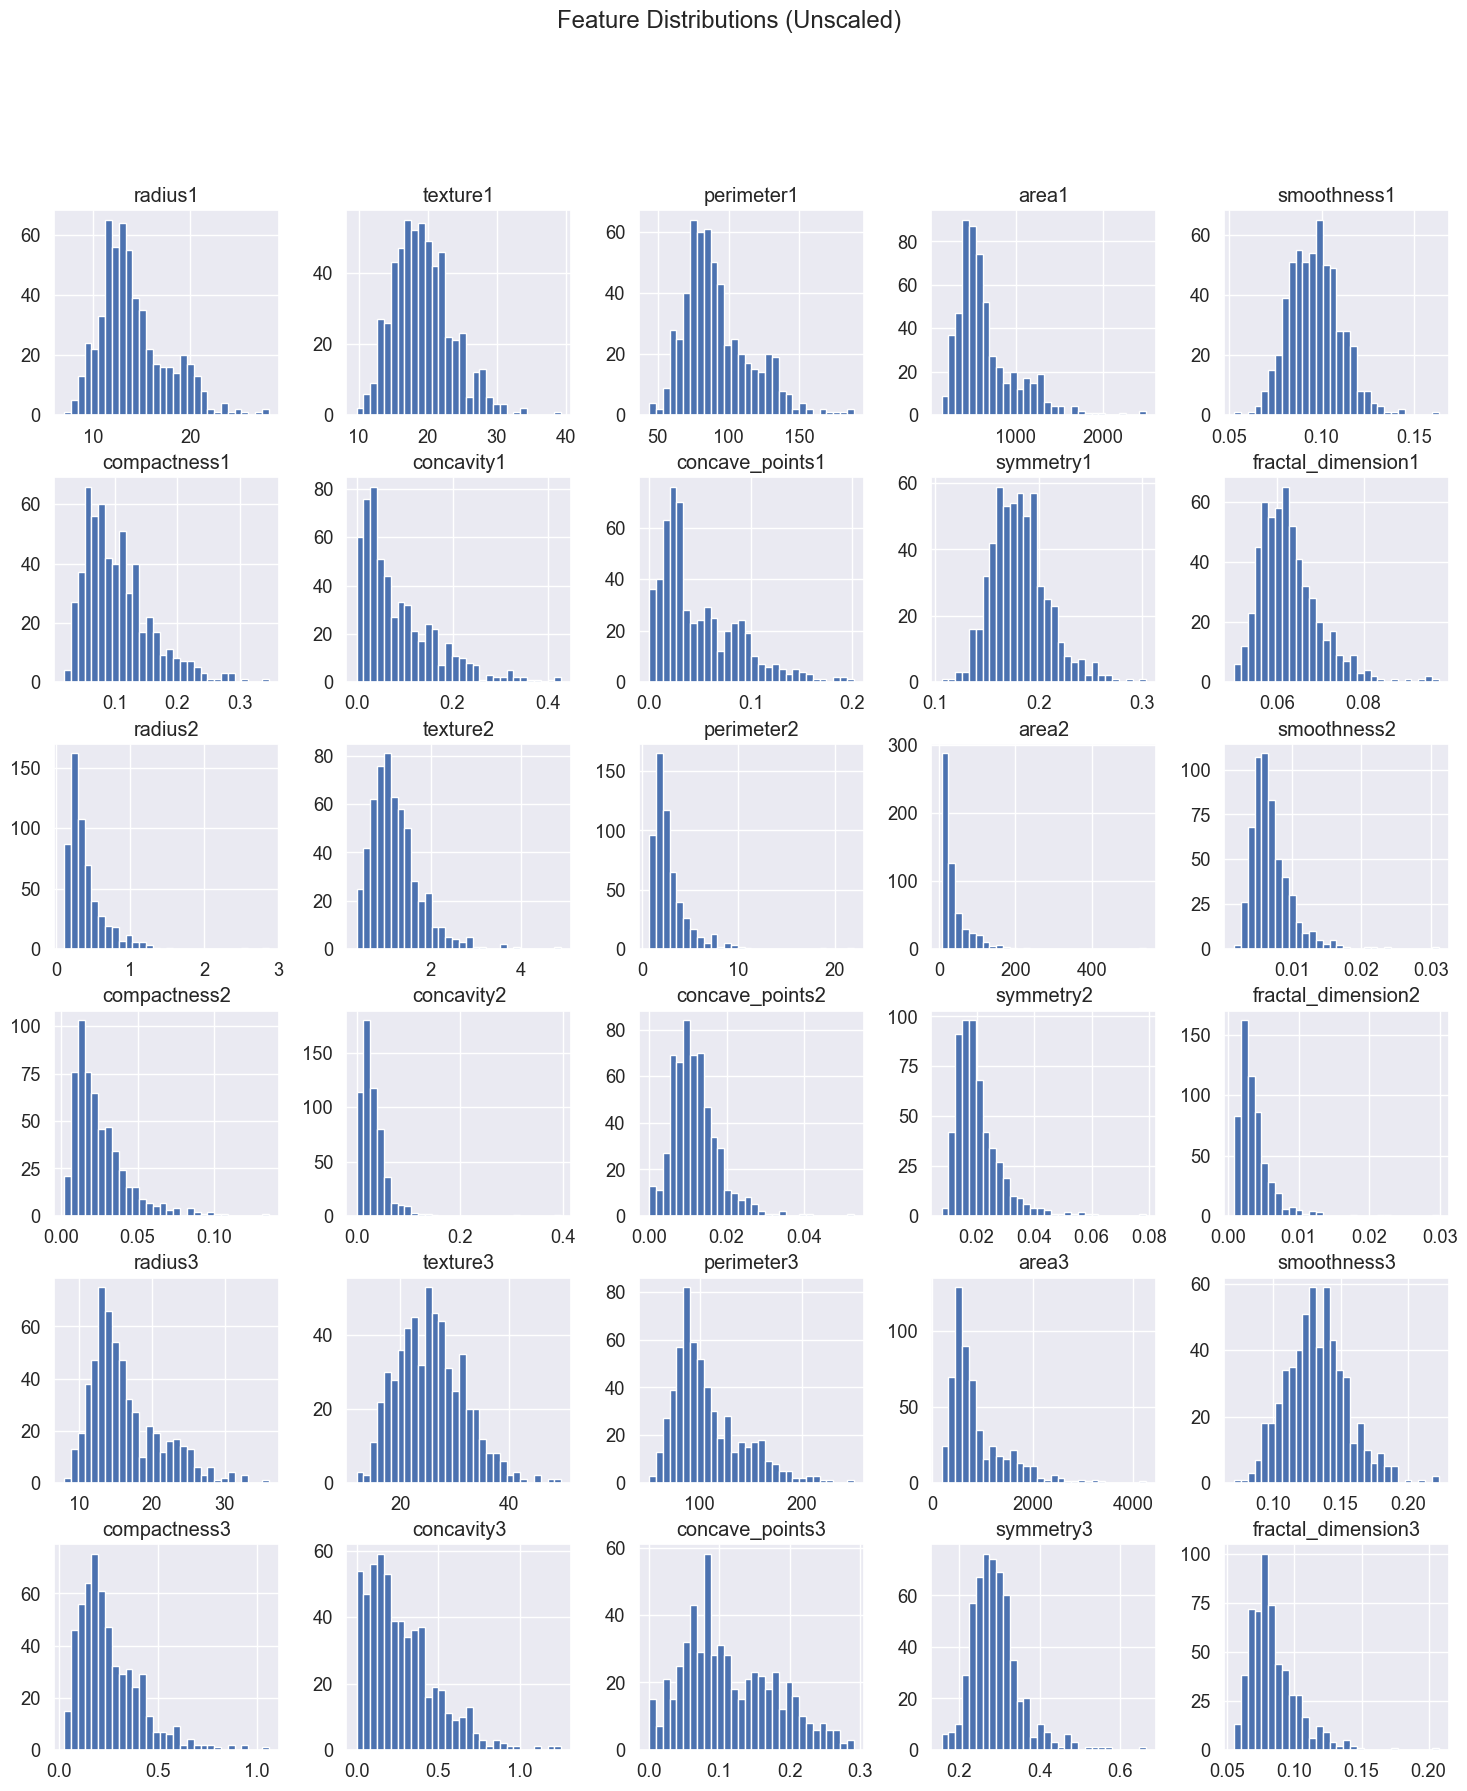

In [377]:
df.drop(columns=['diagnosis']).hist(figsize=(18, 20), bins=30)
plt.suptitle("Feature Distributions (Unscaled)")
plt.show()

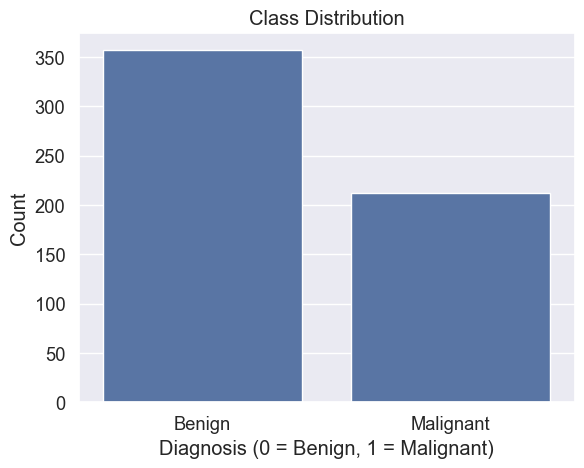

In [378]:
# Plot Class Distribution
sns.countplot(x=y)  
plt.title("Class Distribution")
plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Benign", "Malignant"])
plt.show()

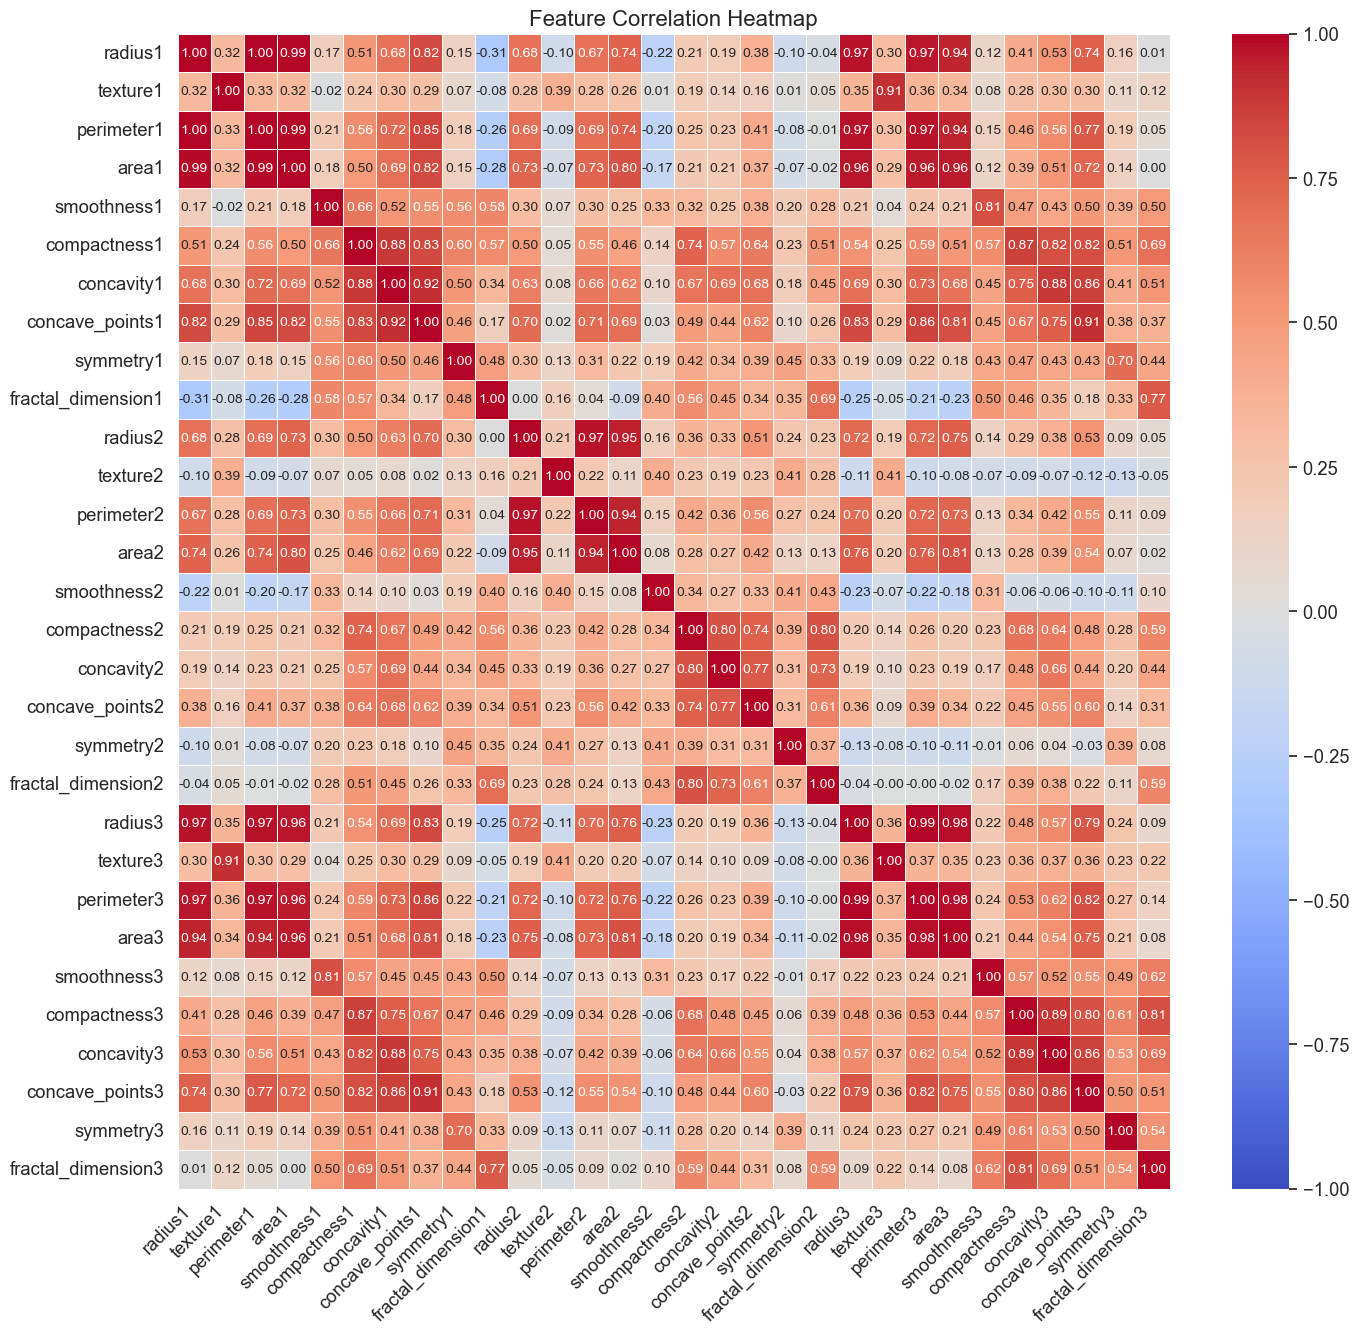

In [379]:
plt.figure(figsize=(16, 15))

sns.set(font_scale=1.2)

# Compute correlation matrix (excluding 'diagnosis')
corr_matrix = df.drop(columns=['diagnosis']).corr()

# Generate heatmap
sns.heatmap(corr_matrix, 
            annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=0.5, annot_kws={"size": 10}, 
            vmin=-1, vmax=1)  # Ensure consistent color range


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


## Removal of Irrelevant and Redundant Features

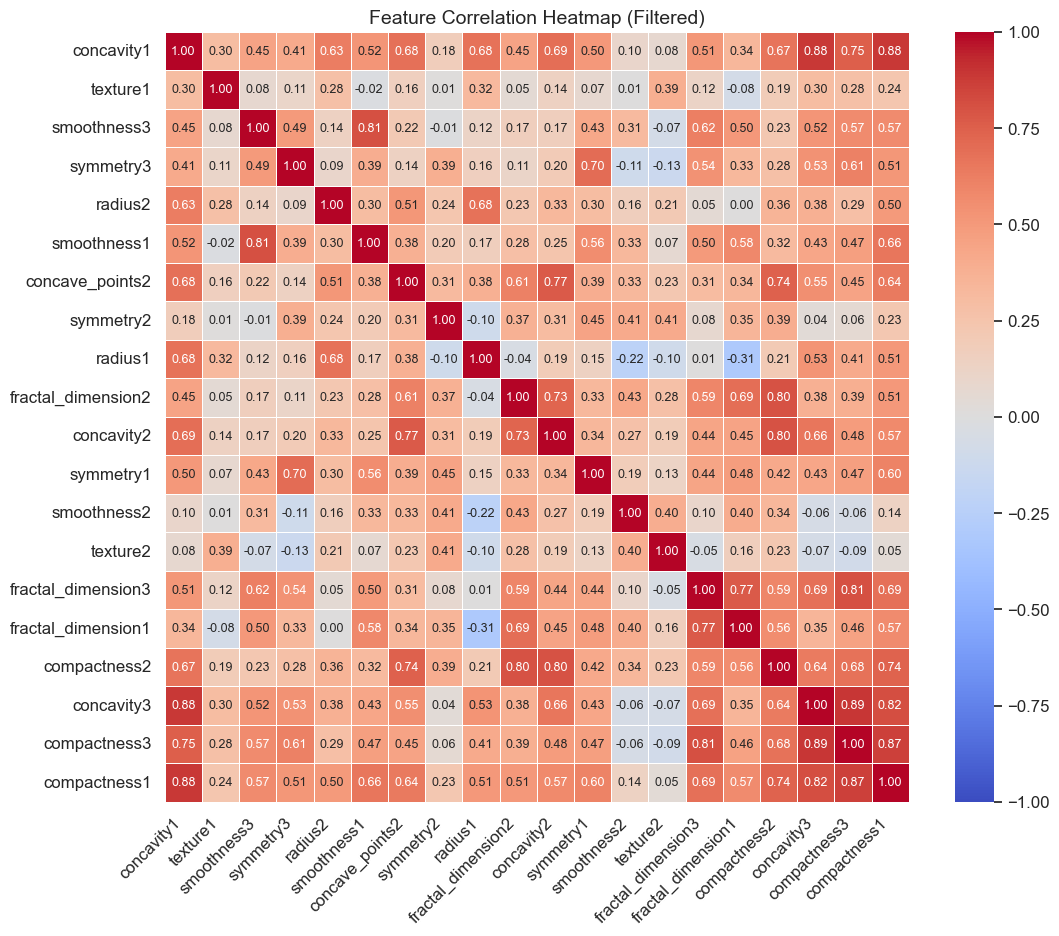

In [388]:
# Compute correlation matrix including 'diagnosis'
full_corr_matrix = df.corr()

# Identify irrelevant features (correlation with 'diagnosis' < 0.05)
irrelevant_features = set(full_corr_matrix.index[abs(full_corr_matrix["diagnosis"]) < 0.05])

# Compute correlation matrix without 'diagnosis'
corr_matrix = df.drop(columns=['diagnosis']).corr()

# Identify redundant features (correlation > 0.9)
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Remove redundant and irrelevant features
filtered_features = list(set(corr_matrix.columns) - high_corr_features - irrelevant_features)

# Subset correlation matrix
filtered_corr_matrix = corr_matrix.loc[filtered_features, filtered_features]

# Plot heatmap with filtered features
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.1)

sns.heatmap(filtered_corr_matrix, 
            annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=0.5, annot_kws={"size": 9}, 
            vmin=-1, vmax=1)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Feature Correlation Heatmap (Filtered)", fontsize=14)
plt.show()


# Split the sample into 60% training, 20% validation, and 20% testing data at random.

## Train-Test-Split for Filtered Features 

In [391]:
# Keep only the filtered features from X
X_filtered = X[filtered_features]

# First, split 60% training and 40% remaining (validation + test)
X_train_f, X_temp_f, y_train_f, y_temp_f = train_test_split(
    X_filtered, y, test_size=0.4, random_state=42, stratify=y
)

# Next, split the remaining 40% into 20% validation and 20% test
X_val_f, X_test_f, y_val_f, y_test_f = train_test_split(
    X_temp_f, y_temp_f, test_size=0.5, random_state=42, stratify=y_temp_f
)

# Confirm the new dataset shapes
print("Train set shape:", X_train_f.shape, y_train_f.shape)
print("Validation set shape:", X_val_f.shape, y_val_f.shape)
print("Test set shape:", X_test_f.shape, y_test_f.shape)

Train set shape: (341, 20) (341,)
Validation set shape: (114, 20) (114,)
Test set shape: (114, 20) (114,)


## Train-Test-Split for Full Features

In [394]:
# First, split 60% training and 40% remaining (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Next, split the remaining 40% into 20% validation and 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (341, 30) (341,)
Validation set shape: (114, 30) (114,)
Test set shape: (114, 30) (114,)


# Logistic Regression

## Feature Scaling

In [174]:
# Define scalers  
scalers = {
    "No Scaling": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

# Define model (only Logistic Regression)  
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver="lbfgs")
}

# Store results  
results = {}

# Train and evaluate Logistic Regression with different scaling techniques  
for scaler_name, scaler in scalers.items():
    # Apply scaling if scaler is not None  
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test  # No scaling  

    # Train and test the model  
    model = models["Logistic Regression"]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate classification metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store metrics  
    results[scaler_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    }

# Convert results to DataFrame  
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Print results with improved formatting
print("\n" + "="*70)
print("    Logistic Regression Performance by Scaling Method    ".center(70))
print("="*70)
print(f"{'Scaling':<20} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-"*70)
for scaling, row in results_df.iterrows():
    print(f"{scaling:<20} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f}")
print("="*70)

# Find the best scaling method based on accuracy
best_scaling = results_df["F1-Score"].idxmax()
best_accuracy = results_df["F1-Score"].max()

# Print the best scaling method
print(f"\n{' Best Scaling for Logistic Regression ':=^70}")
print(f"Best Scaling: {best_scaling} | F1-Score: {best_accuracy:.4f}")
print("="*70)


          Logistic Regression Performance by Scaling Method           
Scaling                Accuracy  Precision     Recall   F1-Score
----------------------------------------------------------------------
StandardScaler           0.9649     0.9668     0.9649     0.9645
MinMaxScaler             0.9561     0.9590     0.9561     0.9555
No Scaling               0.9386     0.9390     0.9386     0.9381

================ Best Scaling for Logistic Regression ================
Best Scaling: StandardScaler | F1-Score: 0.9645


# Model Training

In [177]:
# Define the best scaler
scaler = StandardScaler()

# Apply scaling to all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define and train the Logistic Regression model
model_LogisticRegression = LogisticRegression(max_iter=5000, solver="lbfgs")
model_LogisticRegression.fit(X_train_scaled, y_train)

# Generate predictions for confusion matrices and ROC
train_pred = model_LogisticRegression.predict(X_train_scaled)
val_pred = model_LogisticRegression.predict(X_val_scaled)
test_pred = model_LogisticRegression.predict(X_test_scaled)

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# Evaluate on training, validation, and test sets
train_metrics = compute_metrics(y_train, train_pred)
val_metrics = compute_metrics(y_val, val_pred)
test_metrics = compute_metrics(y_test, test_pred)

# Store results in a DataFrame for easy display
results_df = pd.DataFrame([train_metrics, val_metrics, test_metrics], 
                          index=["Training", "Validation", "Test"])

# Print results
print("\n" + "="*70)
print("    Logistic Regression Performance with StandardScaler    ".center(70))
print("="*70)
print(f"{'Dataset':<15} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-"*70)
for dataset, row in results_df.iterrows():
    print(f"{dataset:<15} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f}")
print("="*70)


         Logistic Regression Performance with StandardScaler          
Dataset           Accuracy  Precision     Recall   F1-Score
----------------------------------------------------------------------
Training            0.9912     0.9913     0.9912     0.9912
Validation          0.9737     0.9748     0.9737     0.9735
Test                0.9649     0.9668     0.9649     0.9645


In [179]:
# Function to format and print confusion matrix
def print_confusion_matrix(cm, dataset_name, classes=None):
    if classes is None:
        classes = [str(i) for i in range(len(cm))]  
    print(f"\n{dataset_name} Confusion Matrix:")
    print("-"*40)
    # Header
    header = " " * 10 + "Predicted\n" + " " * 10 + "".join(f"{cls:>5}" for cls in classes)
    print(header)
    print("-"*40)
    # Rows with true labels
    for i, row in enumerate(cm):
        row_str = f"True {classes[i]:<5} " + "".join(f"{val:>5}" for val in row)
        print(row_str)
    print("-"*40)

# Get unique class labels from y_train
class_labels = sorted(set(y_train))

# Compute confusion matrices
train_cm = confusion_matrix(y_train, train_pred)
val_cm = confusion_matrix(y_val, val_pred)
test_cm = confusion_matrix(y_test, test_pred)

# Print confusion matrices
print_confusion_matrix(train_cm, "Training", class_labels)
print_confusion_matrix(val_cm, "Validation", class_labels)
print_confusion_matrix(test_cm, "Test", class_labels)


Training Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0       214    0
True 1         3  124
----------------------------------------

Validation Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0        71    0
True 1         3   40
----------------------------------------

Test Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0        72    0
True 1         4   38
----------------------------------------


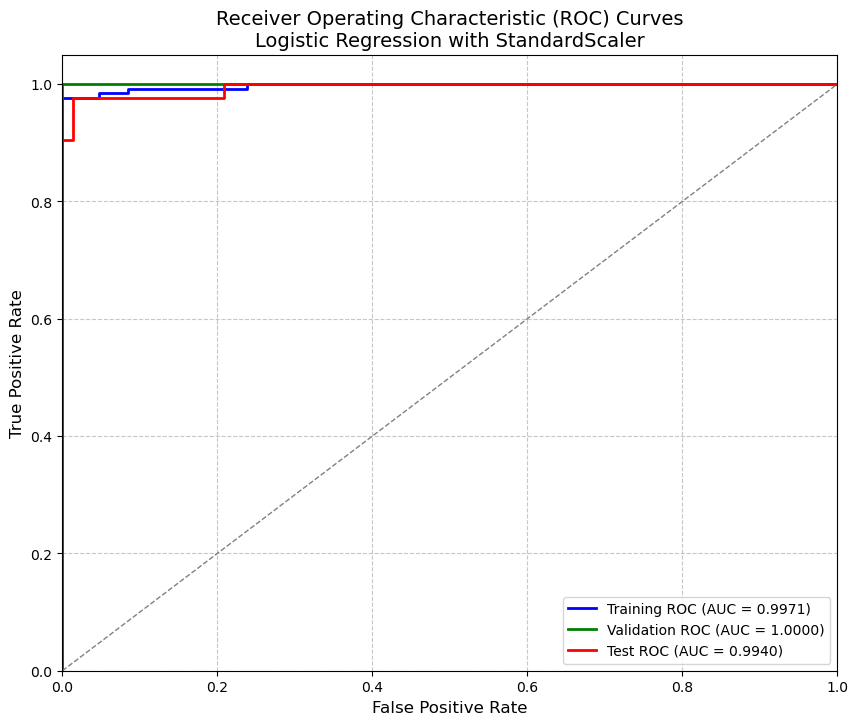

In [181]:
# Get predicted probabilities for ROC
y_train_prob = model_LogisticRegression.predict_proba(X_train_scaled)[:, 1]  # Probability for positive class
y_val_prob = model_LogisticRegression.predict_proba(X_val_scaled)[:, 1]
y_test_prob = model_LogisticRegression.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for each set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC (AUC = {roc_auc_train:.4f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC (AUC = {roc_auc_val:.4f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.4f})')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves\nLogistic Regression with StandardScaler', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# K-Nearest Neighbors (KNN)

In [53]:
# Define scalers  
scalers = {
    "No Scaling": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

# Define model (K-Nearest Neighbors)  
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5)  # Default k=5, adjustable
}

# Store results  
results = {}

# Train and evaluate KNN with different scaling techniques  
for scaler_name, scaler in scalers.items():
    # Apply scaling if scaler is not None  
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test  # No scaling  

    # Train and test the model  
    model = models["KNN"]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate classification metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store metrics  
    results[scaler_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    }

# Convert results to DataFrame  
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Print results with improved formatting
print("\n" + "="*70)
print("    KNN Performance by Scaling Method    ".center(70))
print("="*70)
print(f"{'Scaling':<20} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-"*70)
for scaling, row in results_df.iterrows():
    print(f"{scaling:<20} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f}")
print("="*70)

# Find the best scaling method based on F1-Score
best_scaling = results_df["F1-Score"].idxmax()
best_f1 = results_df["F1-Score"].max()

# Print the best scaling method
print(f"\n{' Best Scaling for KNN ':=^70}")
print(f"Best Scaling: {best_scaling} | F1-Score: {best_f1:.4f}")
print("="*70)



                  KNN Performance by Scaling Method                   
Scaling                Accuracy  Precision     Recall   F1-Score
----------------------------------------------------------------------
MinMaxScaler             0.9825     0.9829     0.9825     0.9824
StandardScaler           0.9649     0.9668     0.9649     0.9645
No Scaling               0.9386     0.9408     0.9386     0.9377

======================== Best Scaling for KNN ========================
Best Scaling: MinMaxScaler | F1-Score: 0.9824


In [55]:
scaler = MinMaxScaler()

# Apply scaling to all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define and train the KNN model
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train_scaled, y_train)

# Generate predictions for confusion matrices and ROC
train_pred = model_KNN.predict(X_train_scaled)
val_pred = model_KNN.predict(X_val_scaled)
test_pred = model_KNN.predict(X_test_scaled)

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# Evaluate on training, validation, and test sets
train_metrics = compute_metrics(y_train, train_pred)
val_metrics = compute_metrics(y_val, val_pred)
test_metrics = compute_metrics(y_test, test_pred)

# Store results in a DataFrame for easy display
results_df = pd.DataFrame([train_metrics, val_metrics, test_metrics], 
                          index=["Training", "Validation", "Test"])

# Print results
print("\n" + "="*70)
print("    KNN Performance with MinMaxScaler    ".center(70))
print("="*70)
print(f"{'Dataset':<15} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-"*70)
for dataset, row in results_df.iterrows():
    print(f"{dataset:<15} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f}")
print("="*70)


                  KNN Performance with MinMaxScaler                   
Dataset           Accuracy  Precision     Recall   F1-Score
----------------------------------------------------------------------
Training            0.9707     0.9714     0.9707     0.9705
Validation          0.9474     0.9515     0.9474     0.9465
Test                0.9825     0.9829     0.9825     0.9824


In [57]:
# Function to format and print confusion matrix
def print_confusion_matrix(cm, dataset_name, classes=None):
    if classes is None:
        classes = [str(i) for i in range(len(cm))]  
    print(f"\n{dataset_name} Confusion Matrix:")
    print("-"*40)
    header = " " * 10 + "Predicted\n" + " " * 10 + "".join(f"{cls:>5}" for cls in classes)
    print(header)
    print("-"*40)
    for i, row in enumerate(cm):
        row_str = f"True {classes[i]:<5} " + "".join(f"{val:>5}" for val in row)
        print(row_str)
    print("-"*40)

# Get unique class labels from y_train
class_labels = sorted(set(y_train))

# Compute confusion matrices
train_cm = confusion_matrix(y_train, train_pred)
val_cm = confusion_matrix(y_val, val_pred)
test_cm = confusion_matrix(y_test, test_pred)

# Print confusion matrices
print_confusion_matrix(train_cm, "Training", class_labels)
print_confusion_matrix(val_cm, "Validation", class_labels)
print_confusion_matrix(test_cm, "Test", class_labels)


Training Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0       213    1
True 1         9  118
----------------------------------------

Validation Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0        71    0
True 1         6   37
----------------------------------------

Test Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0        72    0
True 1         2   40
----------------------------------------


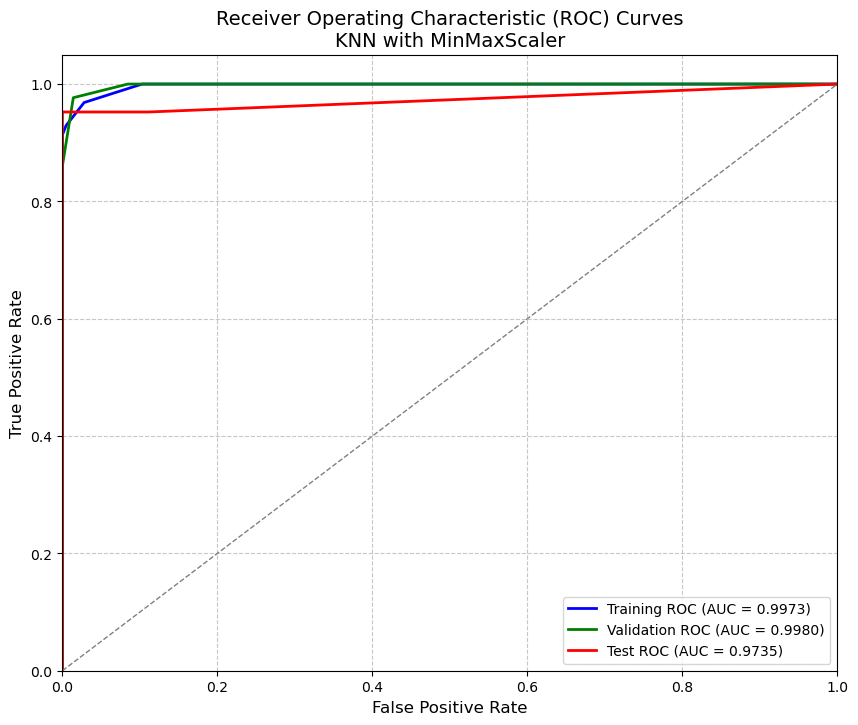

In [59]:
# Get predicted probabilities for ROC
y_train_prob = model_KNN.predict_proba(X_train_scaled)[:, 1]  # Probability for positive class
y_val_prob = model_KNN.predict_proba(X_val_scaled)[:, 1]
y_test_prob = model_KNN.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for each set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC (AUC = {roc_auc_train:.4f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC (AUC = {roc_auc_val:.4f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.4f})')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves\nKNN with MinMaxScaler', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Support Vector Machine (SVM)

In [66]:
# Define scalers  
scalers = {
    "No Scaling": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

# Define model (Support Vector Machine with RBF kernel and probability estimates)  
models = {
    "SVM": SVC(kernel='rbf', probability=True, max_iter=5000)  # Probability=True for ROC
}

# Store results  
results = {}

# Train and evaluate SVM with different scaling techniques  
for scaler_name, scaler in scalers.items():
    # Apply scaling if scaler is not None  
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test  # No scaling  

    # Train and test the model  
    model = models["SVM"]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate classification metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store metrics  
    results[scaler_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    }

# Convert results to DataFrame  
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Print results with improved formatting
print("\n" + "="*70)
print("    SVM Performance by Scaling Method    ".center(70))
print("="*70)
print(f"{'Scaling':<20} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-"*70)
for scaling, row in results_df.iterrows():
    print(f"{scaling:<20} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f}")
print("="*70)


# Find the best scaling method based on F1-Score
best_scaling = results_df["F1-Score"].idxmax()
best_f1 = results_df["F1-Score"].max()

# Print the best scaling method
print(f"\n{' Best Scaling for SVM ':=^70}")
print(f"Best Scaling: {best_scaling} | F1-Score: {best_f1:.4f}")
print("="*70)



                  SVM Performance by Scaling Method                   
Scaling                Accuracy  Precision     Recall   F1-Score
----------------------------------------------------------------------
StandardScaler           0.9825     0.9829     0.9825     0.9824
MinMaxScaler             0.9825     0.9829     0.9825     0.9824
No Scaling               0.9123     0.9230     0.9123     0.9092

======================== Best Scaling for SVM ========================
Best Scaling: StandardScaler | F1-Score: 0.9824


In [68]:
# Define the best scaler 
scaler = StandardScaler()

# Apply scaling to all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define and train the SVM model
model_SVC = SVC(kernel='rbf', probability=True, max_iter=5000)
model_SVC.fit(X_train_scaled, y_train)

# Generate predictions for confusion matrices and ROC
train_pred = model_SVC.predict(X_train_scaled)
val_pred = model_SVC.predict(X_val_scaled)
test_pred = model_SVC.predict(X_test_scaled)

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# Evaluate on training, validation, and test sets
train_metrics = compute_metrics(y_train, train_pred)
val_metrics = compute_metrics(y_val, val_pred)
test_metrics = compute_metrics(y_test, test_pred)

# Store results in a DataFrame for easy display
results_df = pd.DataFrame([train_metrics, val_metrics, test_metrics], 
                          index=["Training", "Validation", "Test"])

# Print results
print("\n" + "="*70)
print("    SVM Performance with StandardScaler    ".center(70))
print("="*70)
print(f"{'Dataset':<15} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-"*70)
for dataset, row in results_df.iterrows():
    print(f"{dataset:<15} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f}")
print("="*70)


                 SVM Performance with StandardScaler                  
Dataset           Accuracy  Precision     Recall   F1-Score
----------------------------------------------------------------------
Training            0.9883     0.9885     0.9883     0.9882
Validation          0.9474     0.9515     0.9474     0.9465
Test                0.9825     0.9829     0.9825     0.9824


In [70]:
# Function to format and print confusion matrix
def print_confusion_matrix(cm, dataset_name, classes=None):
    if classes is None:
        classes = [str(i) for i in range(len(cm))]  
    print(f"\n{dataset_name} Confusion Matrix:")
    print("-"*40)
    header = " " * 10 + "Predicted\n" + " " * 10 + "".join(f"{cls:>5}" for cls in classes)
    print(header)
    print("-"*40)
    for i, row in enumerate(cm):
        row_str = f"True {classes[i]:<5} " + "".join(f"{val:>5}" for val in row)
        print(row_str)
    print("-"*40)

# Get unique class labels from y_train
class_labels = sorted(set(y_train))

# Compute confusion matrices
train_cm = confusion_matrix(y_train, train_pred)
val_cm = confusion_matrix(y_val, val_pred)
test_cm = confusion_matrix(y_test, test_pred)

# Print confusion matrices
print_confusion_matrix(train_cm, "Training", class_labels)
print_confusion_matrix(val_cm, "Validation", class_labels)
print_confusion_matrix(test_cm, "Test", class_labels)

# Get predicted probabilities for ROC
y_train_prob = model_SVC.predict_proba(X_train_scaled)[:, 1]  # Probability for positive class
y_val_prob = model_SVC.predict_proba(X_val_scaled)[:, 1]
y_test_prob = model_SVC.predict_proba(X_test_scaled)[:, 1]


Training Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0       214    0
True 1         4  123
----------------------------------------

Validation Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0        71    0
True 1         6   37
----------------------------------------

Test Confusion Matrix:
----------------------------------------
          Predicted
              0    1
----------------------------------------
True 0        72    0
True 1         2   40
----------------------------------------


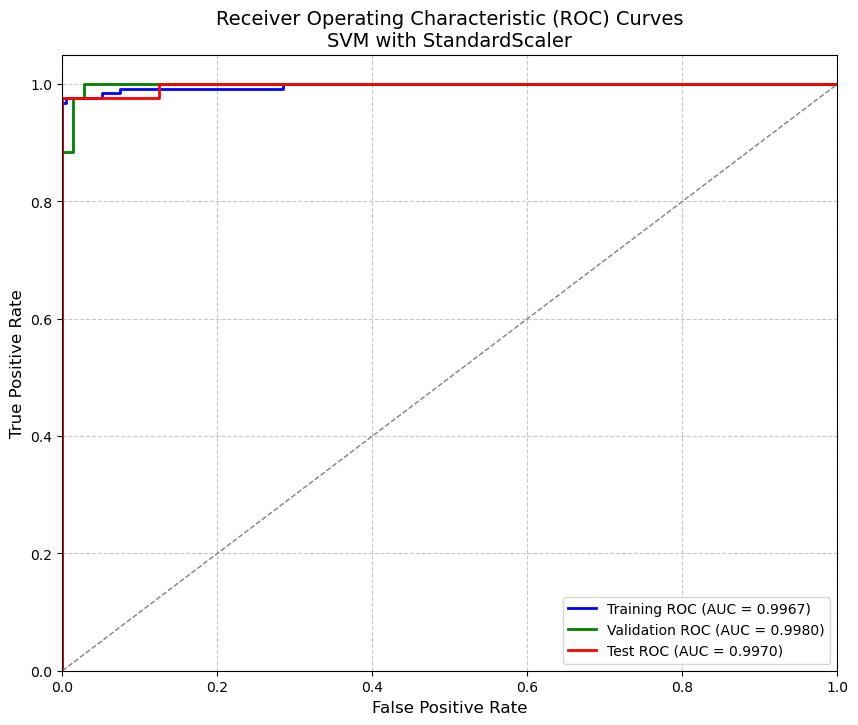

In [72]:
# Compute ROC curve and AUC for each set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC (AUC = {roc_auc_train:.4f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC (AUC = {roc_auc_val:.4f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.4f})')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves\nSVM with StandardScaler', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Comparing Models


                    Model Performance Comparison on Test Set                    
Model                  Accuracy  Precision     Recall   F1-Score        AUC
--------------------------------------------------------------------------------
Logistic Regression      0.9649     0.9668     0.9649     0.9645     0.9940
KNN                      0.9298     0.9331     0.9298     0.9285     0.9339
SVM                      0.9825     0.9829     0.9825     0.9824     0.9970

============================ Best Model by F1-Score ============================
Best Model: SVM | F1-Score: 0.9824

============================== Best Model by AUC ===============================
Best Model: SVM | AUC: 0.9970


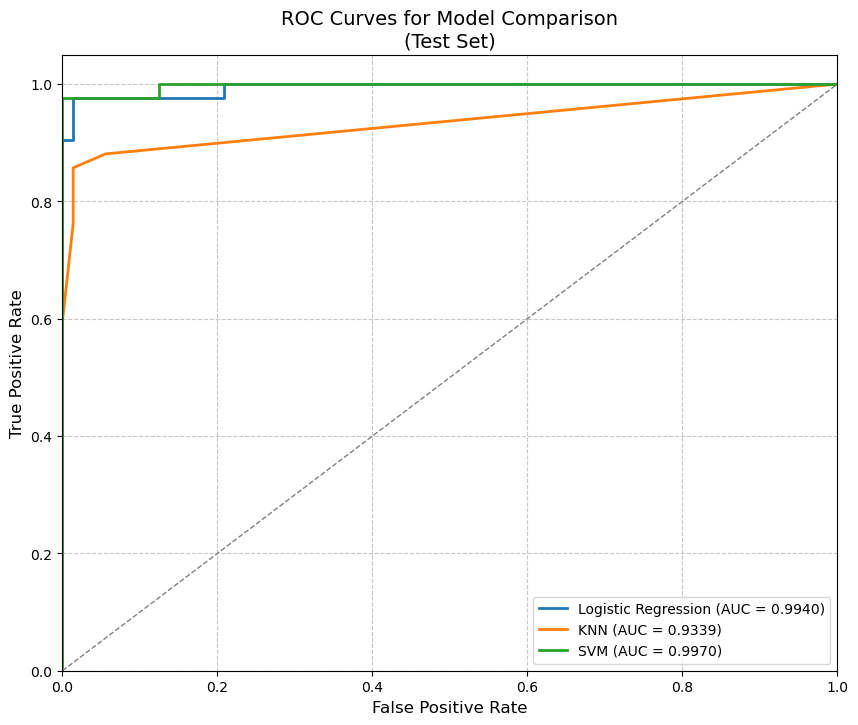

In [79]:
# Dictionary of models
models = {
    "Logistic Regression": model_LogisticRegression,
    "KNN": model_KNN,
    "SVM": model_SVC
}

# Store results
results = {}

# Compute predictions and metrics for each model on the test set
for model_name, model in models.items():
    # Generate predictions
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)[:, 1] 
    
    # Calculate metrics
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    
    # Compute ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store results
    results[model_name] = {
        "F1-Score": f1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "AUC": roc_auc,
        "fpr": fpr,  # Store for ROC plotting
        "tpr": tpr   # Store for ROC plotting
    }

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Print results with improved formatting
print("\n" + "="*80)
print("    Model Performance Comparison on Test Set    ".center(80))
print("="*80)
print(f"{'Model':<20} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'AUC':>10}")
print("-"*80)
for model_name, row in results_df.iterrows():
    print(f"{model_name:<20} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f} {row['AUC']:>10.4f}")
print("="*80)

# Determine the best model based on F1-Score
best_model_f1 = results_df["F1-Score"].idxmax()
best_f1_score = results_df["F1-Score"].max()

# Determine the best model based on AUC
best_model_auc = results_df["AUC"].idxmax()
best_auc = results_df["AUC"].max()

# Print the best models
print(f"\n{' Best Model by F1-Score ':=^80}")
print(f"Best Model: {best_model_f1} | F1-Score: {best_f1_score:.4f}")
print("="*80)

print(f"\n{' Best Model by AUC ':=^80}")
print(f"Best Model: {best_model_auc} | AUC: {best_auc:.4f}")
print("="*80)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], lw=2, label=f'{model_name} (AUC = {result["AUC"]:.4f})')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Model Comparison\n(Test Set)', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Exploratory Data Analysis

# Drafts

## Feature Scaling

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define scalers  
scalers = {
    "No Scaling": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

# Define models  
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver="lbfgs"),  
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC()
}

# Store results  
results = {}

# Train and evaluate models with different scaling techniques  
for scaler_name, scaler in scalers.items():
    # Apply scaling if scaler is not None  
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test  # No scaling  

    # Train and test each model  
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        # Calculate classification metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Store metrics  
        results[(model_name, scaler_name)] = {
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        }

# Convert results to DataFrame  
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=["Model", "Scaling"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Print results with improved formatting
print("\n" + "="*80)
print("           Model Performance Comparison (Classification Metrics)           ".center(80))
print("="*80)
print(f"{'Model':<30} {'Scaling':<15} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-"*80)
for (model, scaling), row in results_df.iterrows():
    print(f"{model:<30} {scaling:<15} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f}")
print("="*80)

# Find the highest accuracy value
best_accuracy = results_df["Accuracy"].max()

# Get all models that achieved the highest accuracy
best_models = results_df[results_df["Accuracy"] == best_accuracy]

# Print best models with improved formatting
print(f"\n\n{' Top Performing Model(s) ':=^80}")
print(f"Best Accuracy Achieved: {best_accuracy:.4f}")
print("-"*80)
print(f"{'Model':<30} {'Scaling':<15} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-"*80)
for (model, scaling), row in best_models.iterrows():
    print(f"{model:<30} {scaling:<15} {row['Accuracy']:>10.4f} {row['Precision']:>10.4f} {row['Recall']:>10.4f} {row['F1-Score']:>10.4f}")
print("="*80)


             Model Performance Comparison (Classification Metrics)              
Model                          Scaling           Accuracy  Precision     Recall   F1-Score
--------------------------------------------------------------------------------
Support Vector Machine (SVM)   StandardScaler      0.9825     0.9829     0.9825     0.9824
K-Nearest Neighbors (KNN)      MinMaxScaler        0.9825     0.9829     0.9825     0.9824
Support Vector Machine (SVM)   MinMaxScaler        0.9825     0.9829     0.9825     0.9824
Logistic Regression            StandardScaler      0.9649     0.9668     0.9649     0.9645
K-Nearest Neighbors (KNN)      StandardScaler      0.9649     0.9668     0.9649     0.9645
Logistic Regression            MinMaxScaler        0.9561     0.9590     0.9561     0.9555
Logistic Regression            No Scaling          0.9386     0.9390     0.9386     0.9381
K-Nearest Neighbors (KNN)      No Scaling          0.9386     0.9408     0.9386     0.9377
Support Vector Mac

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform all splits
X_train = scaler.fit_transform(X_train)  # Fit & transform training data
X_val = scaler.transform(X_val)  # Transform validation data
X_test = scaler.transform(X_test)  # Transform test data

# Print dataset sizes
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Testing set: {len(X_test)} samples")

In [114]:
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train.values.ravel())

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [116]:
# Evaluate the model
def evaluate_model(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"\n{dataset_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_val, y_val_pred, "Validation Set")
evaluate_model(y_test, y_test_pred, "Test Set")


Training Set Performance:
Accuracy: 0.9912
Precision: 1.0000
Recall: 0.9764
F1 Score: 0.9880
Confusion Matrix:
[[214   0]
 [  3 124]]

Validation Set Performance:
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9302
F1 Score: 0.9639
Confusion Matrix:
[[71  0]
 [ 3 40]]

Test Set Performance:
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9048
F1 Score: 0.9500
Confusion Matrix:
[[72  0]
 [ 4 38]]


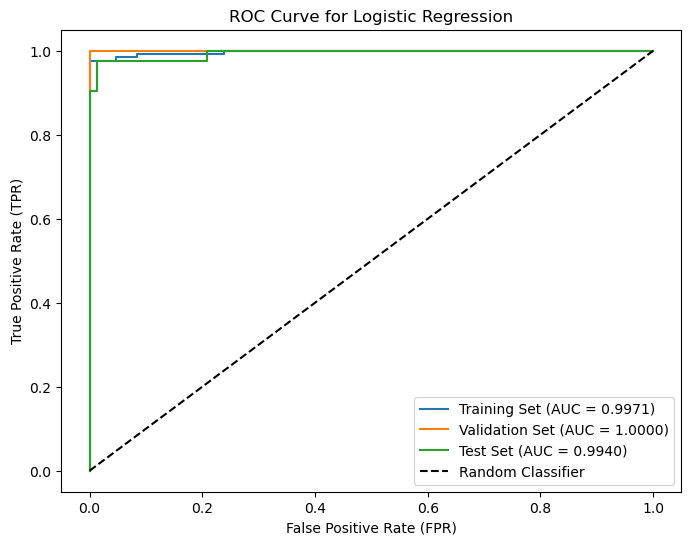

In [124]:
y_train_prob = model.predict_proba(X_train)[:, 1]
y_val_prob = model.predict_proba(X_val)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

def plot_roc_curve(y_true, y_prob, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{dataset_name} (AUC = {roc_auc:.4f})')

# Plot ROC curves
plt.figure(figsize=(8, 6))
plot_roc_curve(y_train, y_train_prob, "Training Set")
plot_roc_curve(y_val, y_val_prob, "Validation Set")
plot_roc_curve(y_test, y_test_prob, "Test Set")

# Plot baseline (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Labels and legend
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [114]:
import chardet

with open("cleveland.data", "rb") as f:
    result = chardet.detect(f.read())

encoding_used = result['encoding']
print(f"Detected encoding: {encoding_used}")

your_data = pd.read_csv("cleveland.data", sep=',', encoding=encoding_used)

Detected encoding: Windows-1252


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 58833: character maps to <undefined>